## Abstract 
Polycystic ovary syndrome (PCOS), also known as 
polycystic ovarian syndrome, is a hormonal endocrine disorder 
among women of reproductive age.
Machine Learning is capable of 
"learning" features from very large amount through clinical 
practice to diagnose this disorder.
The solution is to build a model which helps in early detection and 
prediction of PCOS treatment from an optimal and minimal set 
of parameters which have been statistically analyzed. The solution is built using machine learning algorithms such as Random Forest, Decision Tree, Support Vector Classifier, Logistic 
Regression, K-Nearest neighbors, XGBRF, CatBoost Classifier.er.

### Dataset:
####
Patient File No. : This is the report number which has data for a particular patient

PCOS : Polycystic ovary syndrome (PCOS) is a hormonal disorder common among women of reproductive age, we would like to determine whether the patient has this syndrome or not
Age (yrs) : Age of patient in years

Weight (Kg) : Weight of patient in kg

Height(Cm) : Height of patient in centimeter

BMI : Body mass index of the patient

Blood Group : Blood Group of the patient A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18 (total 8 blood groups)

Pulse rate(bpm) : It is the heart rate of patient in beats per minute. Resting heart rate for adults ranges from 60 to 100 beats per minute

RR (breaths/min) : It is the respiration rate. Normal respiration rates for an adult person at rest range from 12 to 16 breaths per minute.

Hb(g/dl) : Hemoglobin levels in gram per deciliter. For women, a normal level ranges between 12.3 gm/dL and 15.3 gm/dL.

Cycle(R/I) : ....

Cycle length(days) : This represents length of menstrual cycle. The length of the menstrual cycle varies from woman to woman, but the average is to have periods every 28 days.

Marraige Status (Yrs) : Years of marriage

Pregnant(Y/N) : If the patient is pregnant

No. of aborptions : No. of aborptions, if any. There are total 541 values out of which 437 patients never had any abortions.

I beta-HCG(mIU/mL) : this is case 1 of beta hcg

II beta-HCG(mIU/mL) : this is case 2 of beta hcg (please note: An beta hCG level of less than 5 mIU/mL is considered negative for pregnancy, and anything above 25 mIU/mL is considered positive for pregnancy) (also the unit mIU/mL is mili International Units per miliLiter)

FSH(mIU/mL) : Its full form is Follicle-stimulating hormone. During puberty: it ranges from 0.3 to 10.0 mIU/mL (0.3 to 10.0 IU/L) Women who are still 
menstruating: 4.7 to 21.5 mIU/mL (4.5 to 21.5 IU/L) After menopause: 25.8 to 134.8 mIU/mL (25.8 to 134.8 IU/L)

LH(mIU/mL) : It is Luteinizing Hormone.

FSH/LH : Ratio of FSH and LH

Hip(inch) : Hip size in inches

Waist(inch) : Waist Size in inches

Waist:Hip Ratio : Waist by hip ratio

TSH (mIU/L) : It is thyroid stimulating hormone. Normal values are from 0.4 to 4.0 mIU/L

AMH(ng/mL) : It is Anti-Mullerian Hormone.

PRL(ng/mL) : This represents Prolactin levels.

Vit D3 (ng/mL): Vitamin D levels. Normal vitamin D levels in the blood are 20 ng/ml or above for adults.

PRG(ng/mL): Progesterone levels

RBS(mg/dl): This value is obtained by doing Random Blood Sugar (RBS) Test.

Weight gain(Y/N): Is there been a weight gain

hair growth(Y/N): Is there been a hair growth

Skin darkening (Y/N): Skin darkening issues

Hair loss(Y/N): hair loss issues

Pimples(Y/N): pimples issues

Fast food (Y/N): is fast food part of you diet

Reg.Exercise(Y/N): do you do exercises on a regular basis

BP _Systolic (mmHg): Systolic blood pressure, measures the pressure in your arteries when your heart beats.

BP _Diastolic (mmHg): Diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.

Follicle No. (L): Follicles number in the left side

Follicle No. (R): Follicles number in the right side

Avg. F size (L) (mm): Average Follicle size in the left side in mm

Avg. F size (R) (mm): Average Follicle size in the right side in mm

Endometrium (mm): Size of Endometrium in mm


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
import lightgbm
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

## Data Loading

In [3]:
# GitHub link to the XLSX file
github_link = "https://github.com/ChaitraliKatkar/Pcos-Detect/raw/main/PCOS_data_without_infertility.xlsx"

# Read the XLSX file from the GitHub link
df= pd.read_excel(github_link, sheet_name='Full_new', engine='openpyxl')
df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [4]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [5]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


## Data Preprocessing
1. Dropping the not required columns
2. Encoding of Categorical Variables(dtype Objects)
3. Handling missing values

In [6]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [7]:
# Dropping the not required columns
df=df.drop(["Sl. No","Patient File No.","Unnamed: 44"],axis=1)

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [9]:
df["AMH(ng/mL)"].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [10]:
df["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

In [11]:
# Encoding of Categorical Variables(dtype Objects)
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"],errors='coerce')

In [12]:
df.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [13]:
# Handling missing values
df["Marraige Status (Yrs)"].fillna(df["Marraige Status (Yrs)"].median(),inplace=True)
df["II    beta-HCG(mIU/mL)"].fillna(df["II    beta-HCG(mIU/mL)"].median(),inplace=True)
df["AMH(ng/mL)"].fillna(df["AMH(ng/mL)"].median(),inplace=True)
df["Fast food (Y/N)"].fillna(df["Fast food (Y/N)"].median(),inplace=True)

In [14]:
df.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

## Data Visualization

In [15]:
df.columns=[col.strip() for col in df.columns]

In [16]:
colors = ['#1f77b4','#ff7f0e']
def bar_plot(variable):
    """
     input: variable example : Target
     output: bar plot & value count
     
    """
    # Get feature
    var = df[variable]
    # Count number of categorical variable(value/sample)
    varValue = var.value_counts()
    # Visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue,color=colors)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

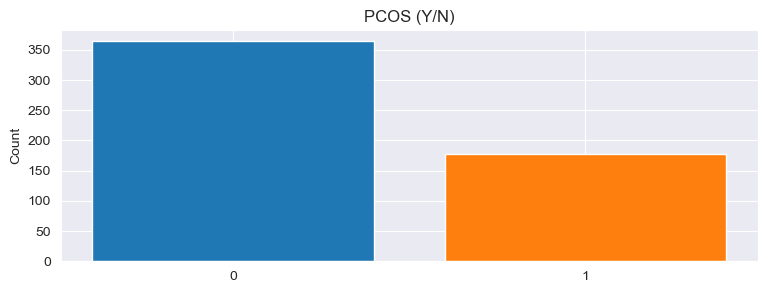

PCOS (Y/N): 
 PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64


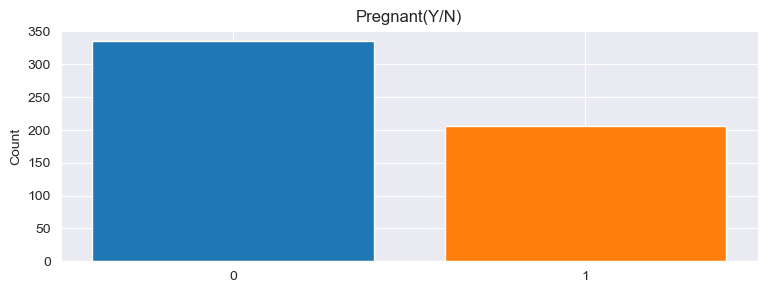

Pregnant(Y/N): 
 Pregnant(Y/N)
0    335
1    206
Name: count, dtype: int64


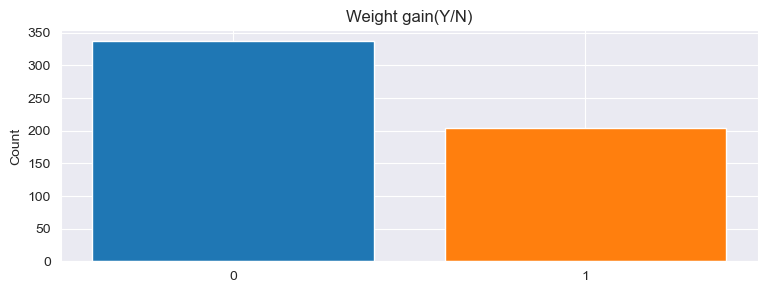

Weight gain(Y/N): 
 Weight gain(Y/N)
0    337
1    204
Name: count, dtype: int64


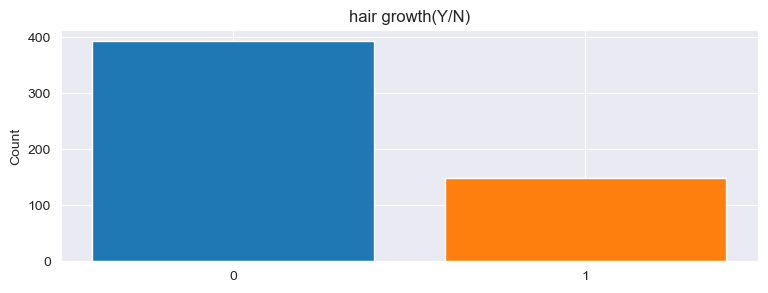

hair growth(Y/N): 
 hair growth(Y/N)
0    393
1    148
Name: count, dtype: int64


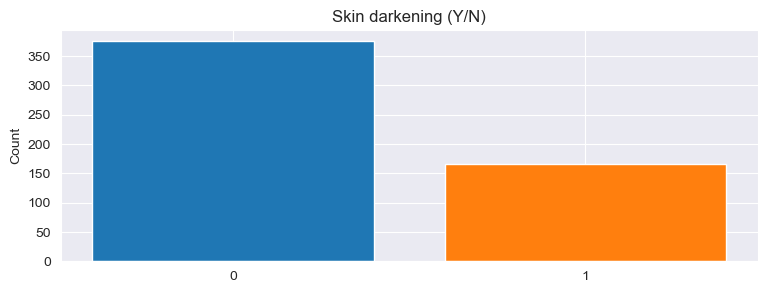

Skin darkening (Y/N): 
 Skin darkening (Y/N)
0    375
1    166
Name: count, dtype: int64


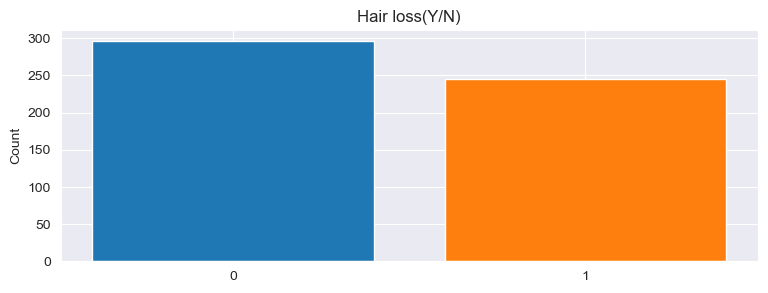

Hair loss(Y/N): 
 Hair loss(Y/N)
0    296
1    245
Name: count, dtype: int64


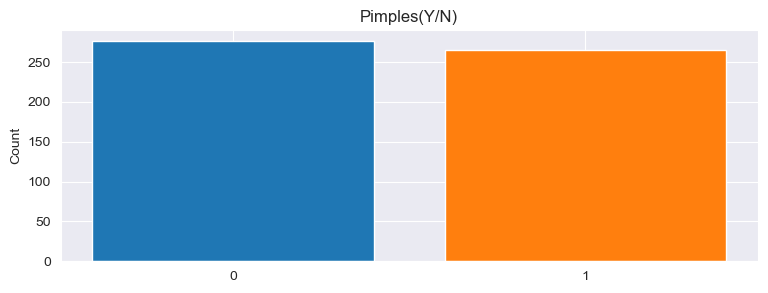

Pimples(Y/N): 
 Pimples(Y/N)
0    276
1    265
Name: count, dtype: int64


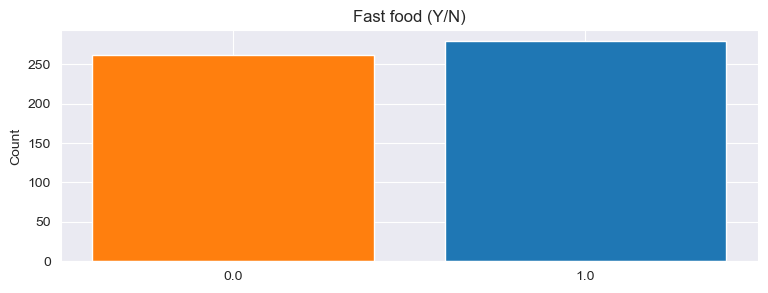

Fast food (Y/N): 
 Fast food (Y/N)
1.0    279
0.0    262
Name: count, dtype: int64


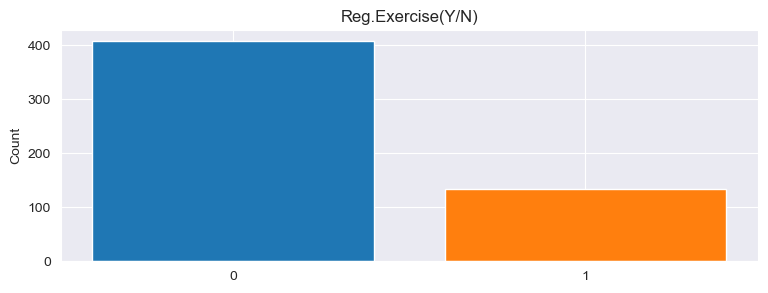

Reg.Exercise(Y/N): 
 Reg.Exercise(Y/N)
0    407
1    134
Name: count, dtype: int64


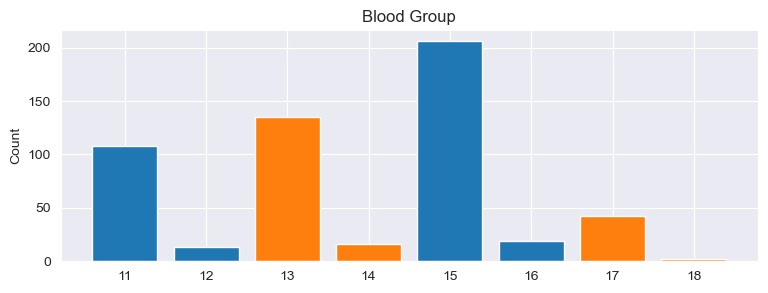

Blood Group: 
 Blood Group
15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: count, dtype: int64


In [17]:
category = ["PCOS (Y/N)", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

In [18]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50,color=colors[0])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

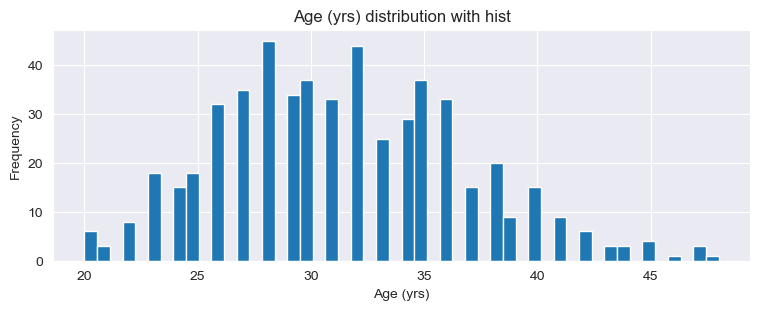

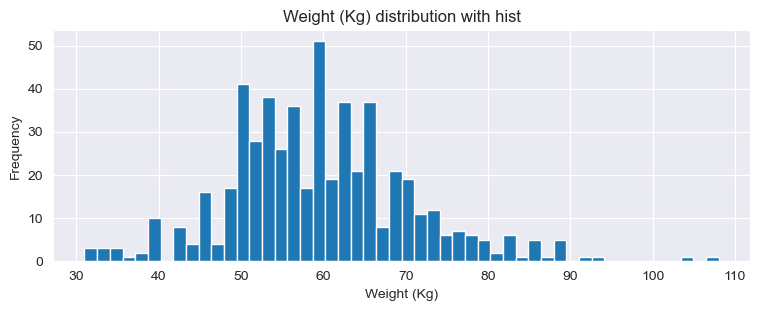

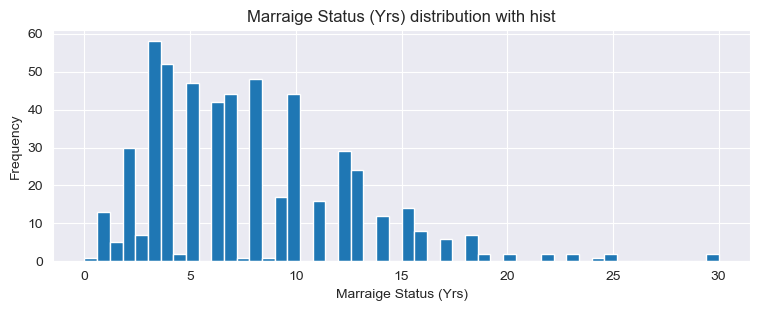

In [19]:
numericVar = ["Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64


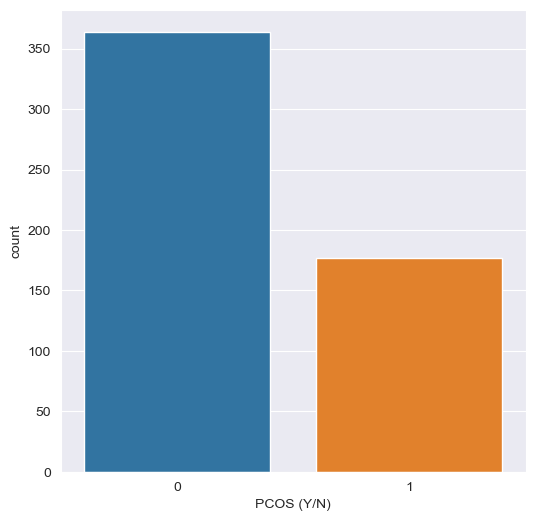

In [20]:
print(df['PCOS (Y/N)'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='PCOS (Y/N)',
    data=df
);

Cycle length(days)
5     276
6      91
4      61
2      38
3      36
7      19
9       9
11      5
8       2
12      2
0       1
10      1
Name: count, dtype: int64


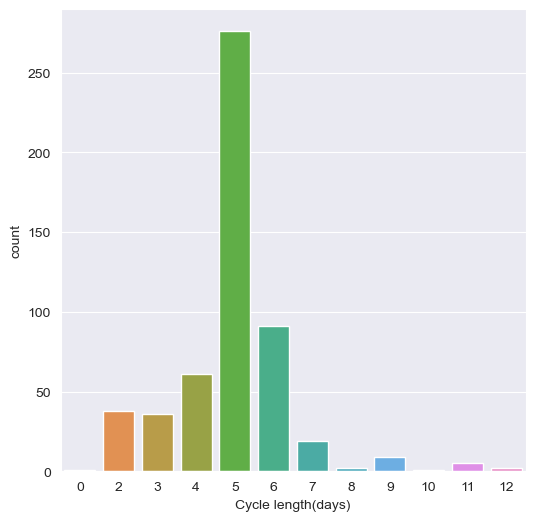

In [21]:
print(df['Cycle length(days)'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='Cycle length(days)',
    data=df
);

BP _Systolic (mmHg)
110    264
120    253
100     13
130      8
140      2
12       1
Name: count, dtype: int64


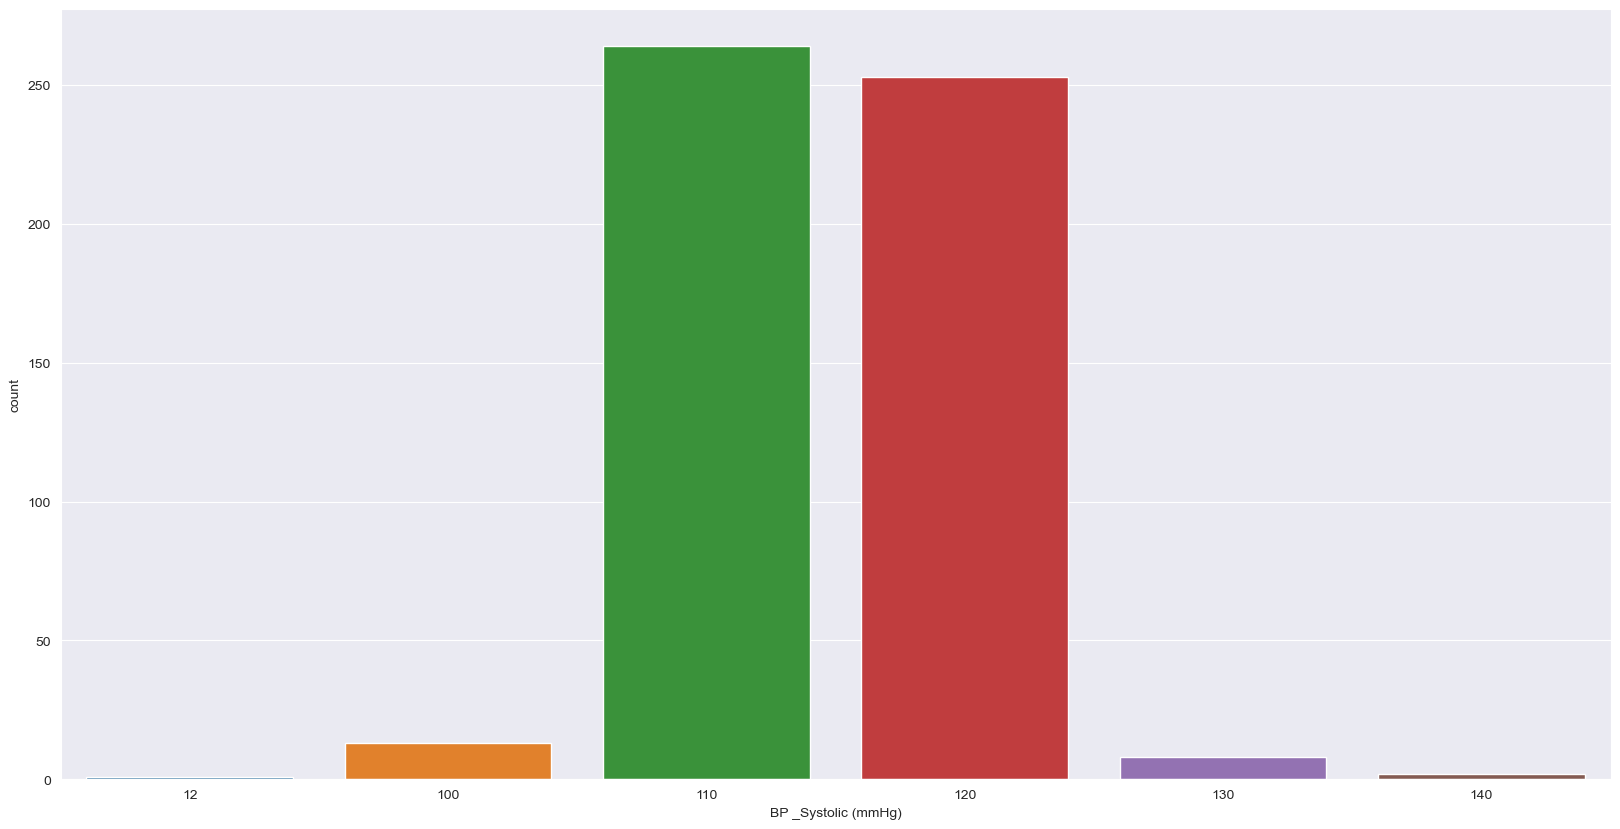

In [22]:
print(df['BP _Systolic (mmHg)'].value_counts())
plt.figure(figsize=(20, 10))
sns.countplot(
    x='BP _Systolic (mmHg)',
    data=df
);

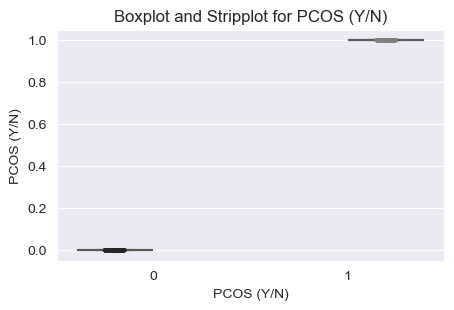

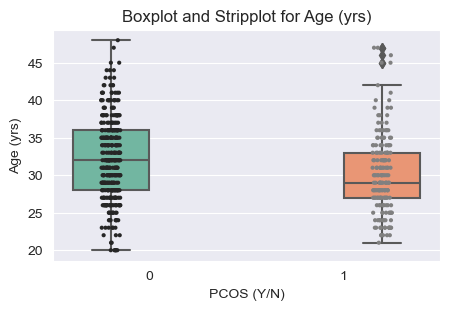

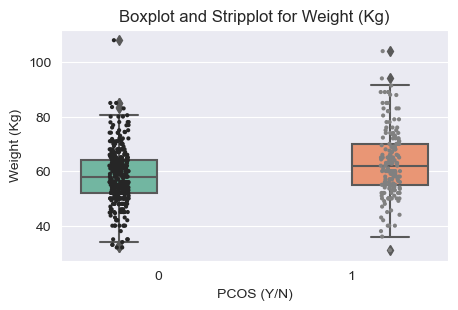

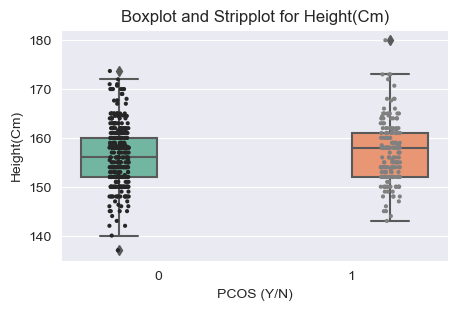

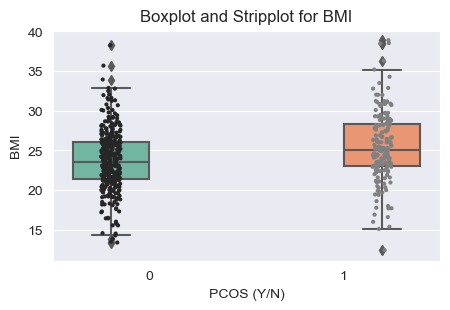

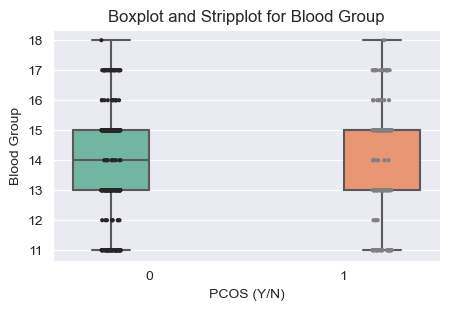

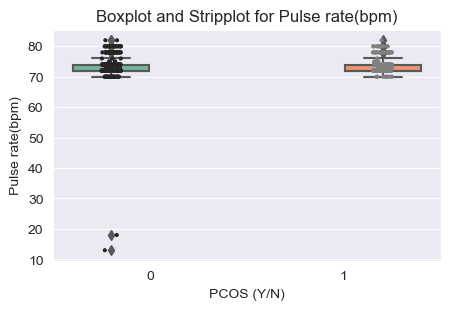

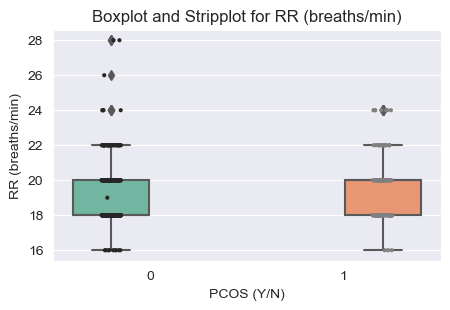

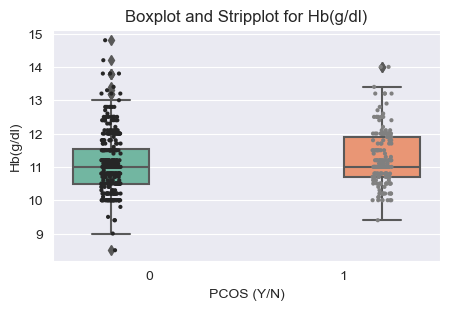

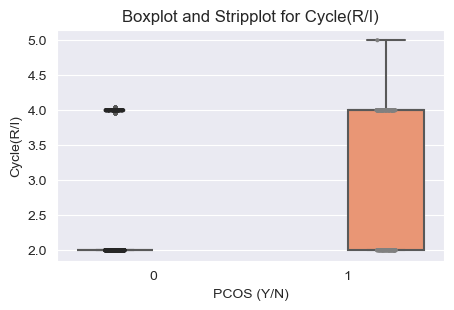

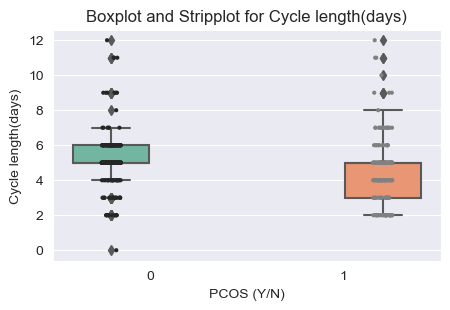

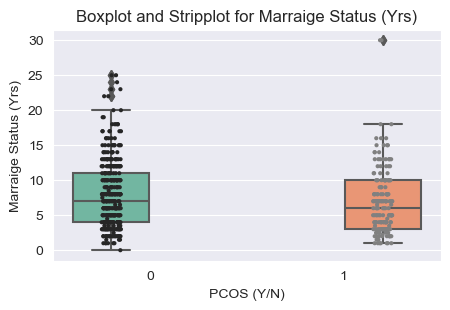

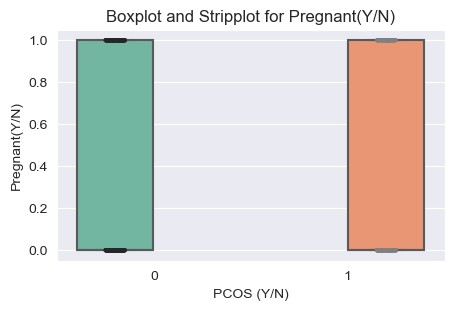

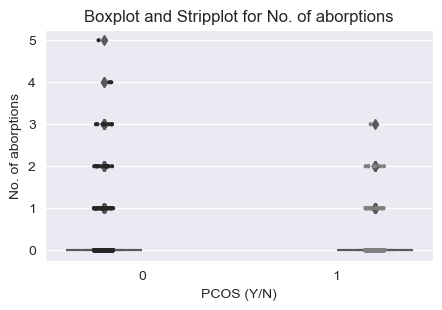

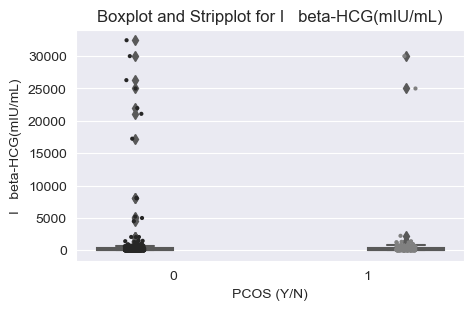

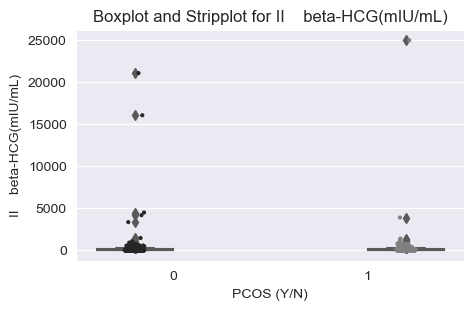

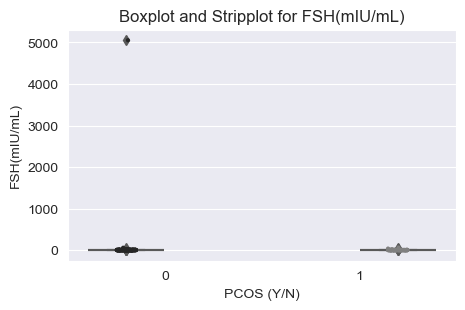

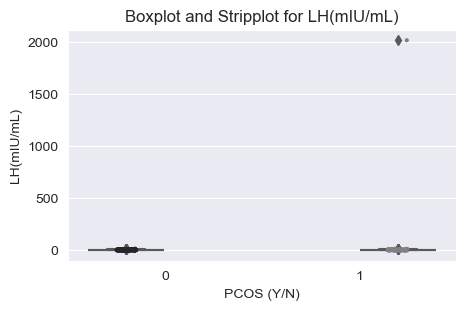

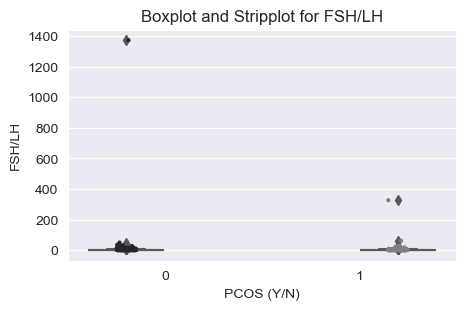

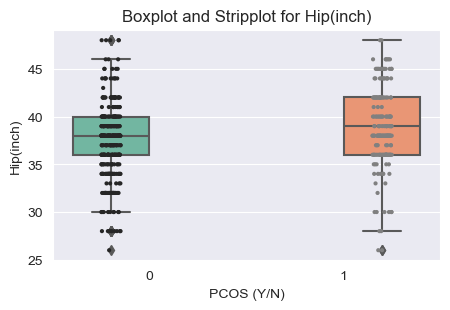

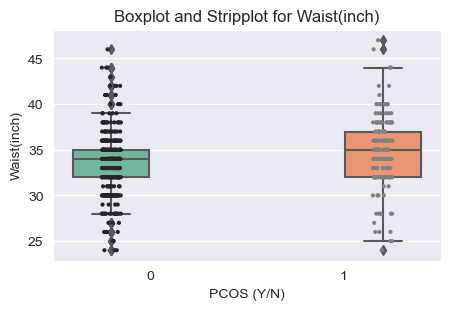

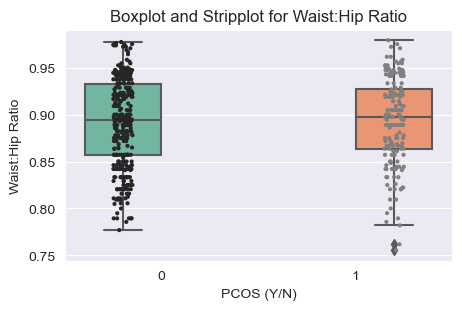

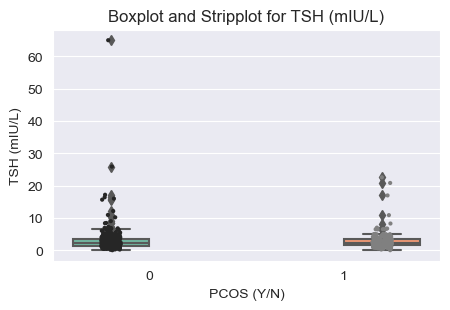

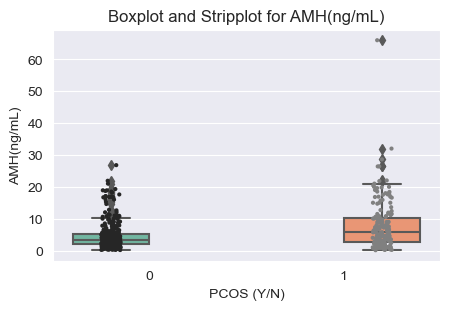

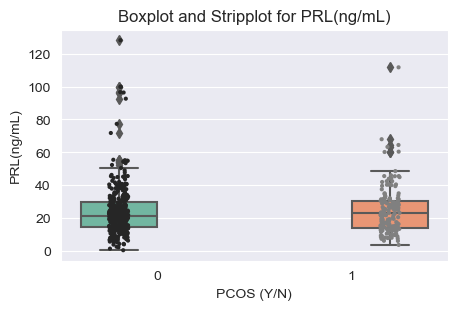

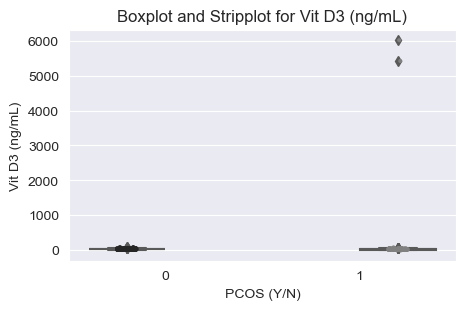

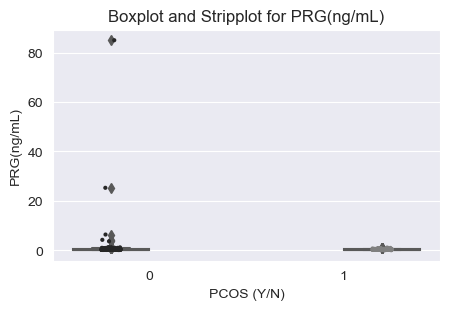

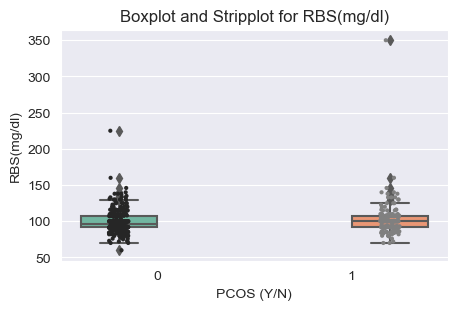

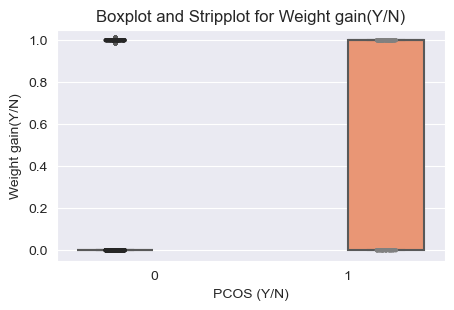

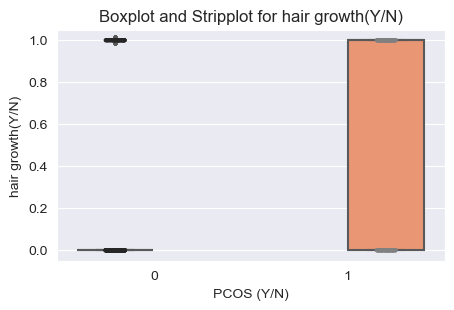

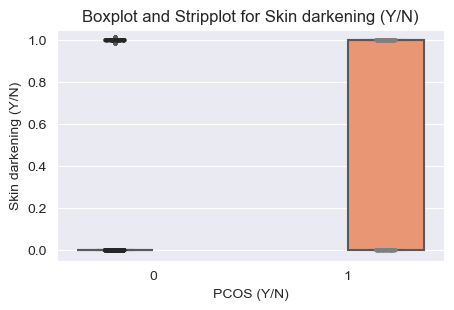

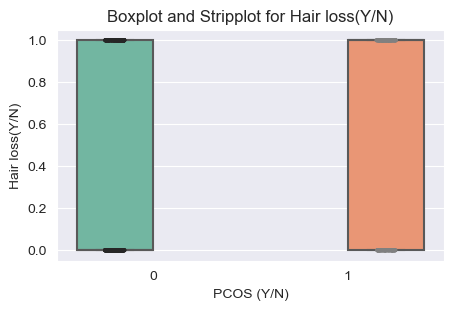

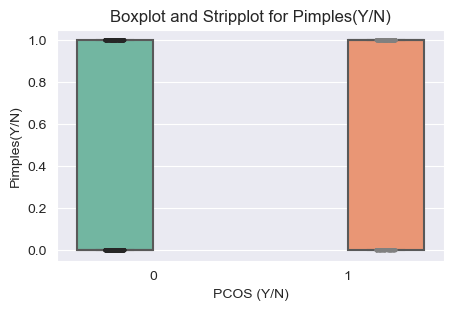

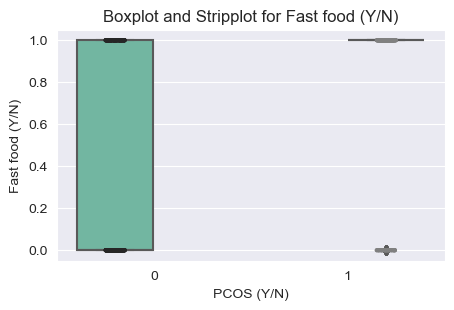

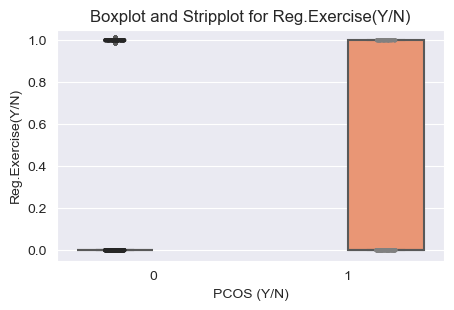

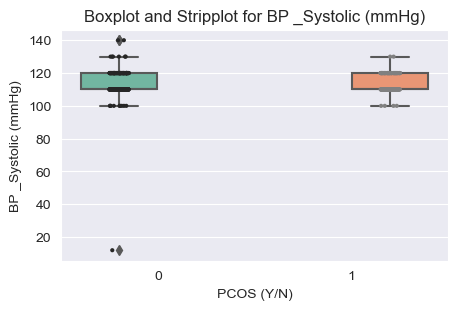

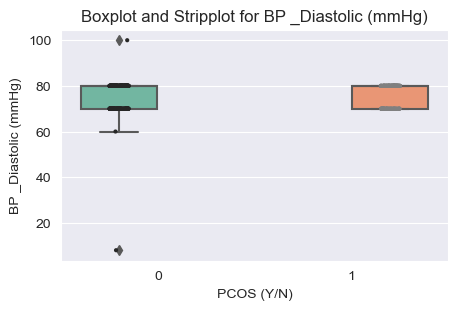

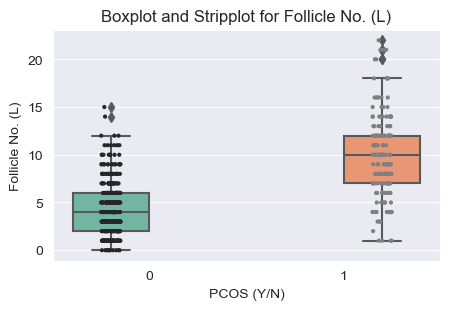

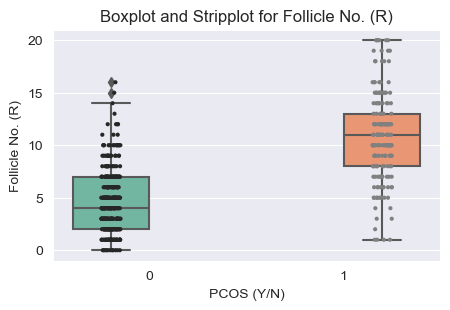

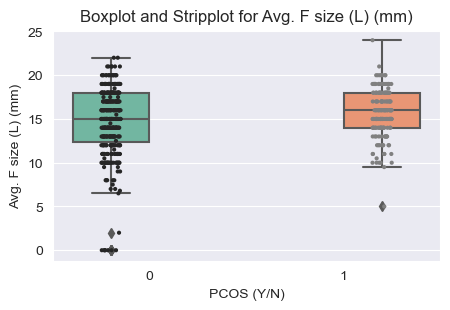

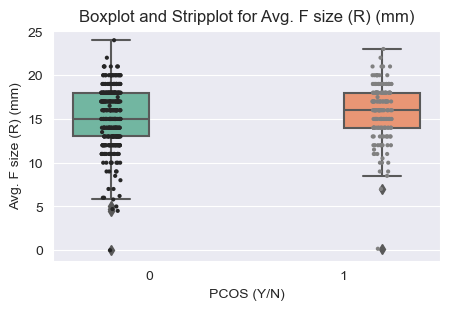

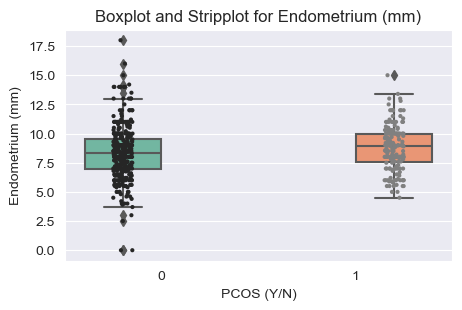

In [23]:

# First, identify the continuous features, assuming they are all numeric except the target.
continuous_features = df.select_dtypes(include=[np.number]).columns.tolist()
target = 'PCOS (Y/N)'  

# Creating box+strip plots for continuous data features.
for feature in continuous_features:
    plt.figure(figsize=(5,3))
    # Create the boxplot
    sns.boxplot(data=df, x=target, y=feature, hue=target, palette="Set2")
    # Overlay with a stripplot
    sns.stripplot(data=df, y=feature, x=target, jitter=True, size=3, color='grey', hue=target, dodge=True)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.title(f"Boxplot and Stripplot for {feature}")
    # Hide the legend for the stripplot as it's redundant with the boxplot's legend
    plt.legend([],[], frameon=False)
    plt.show()


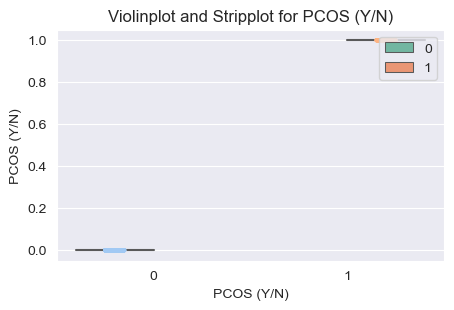

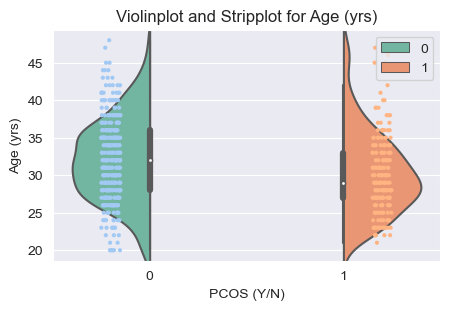

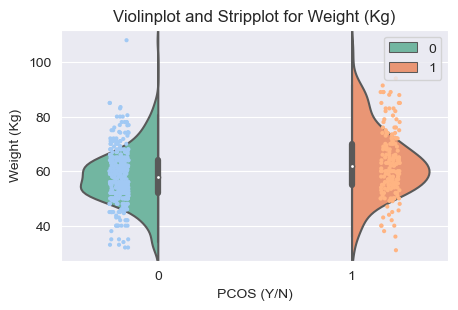

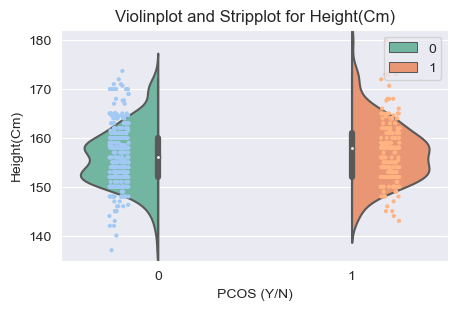

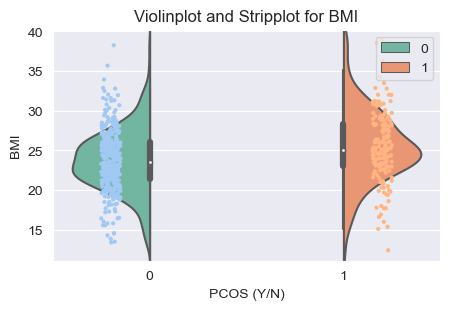

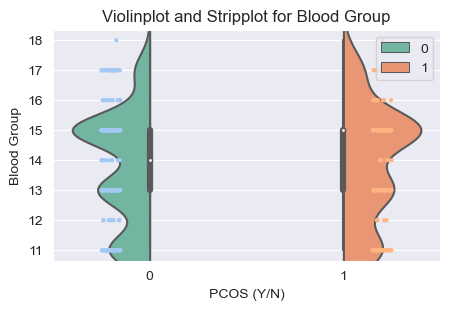

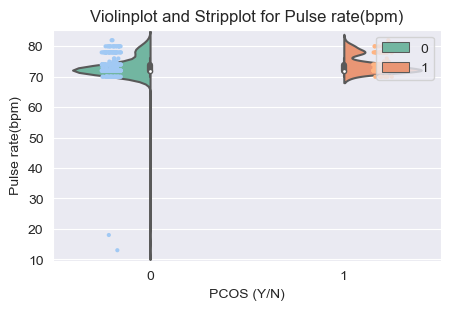

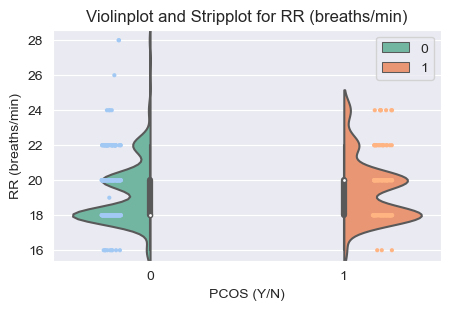

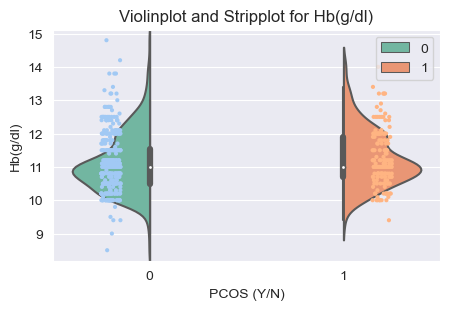

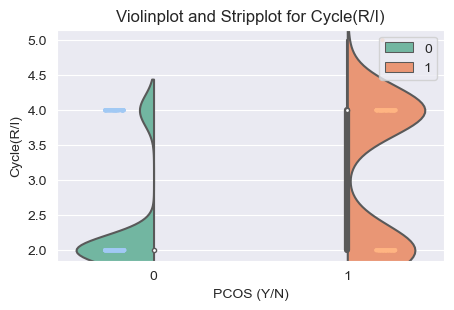

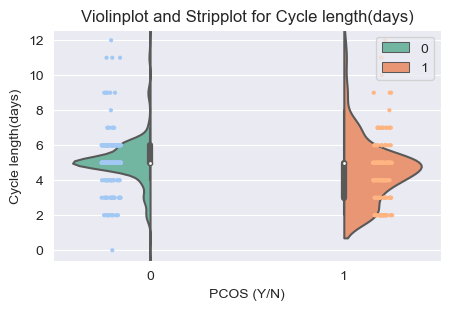

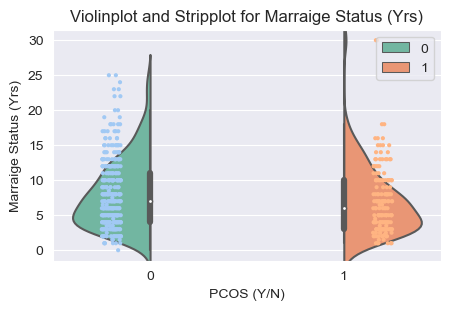

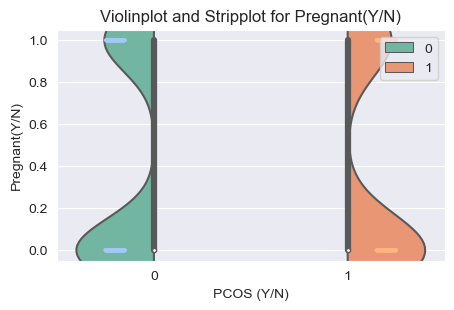

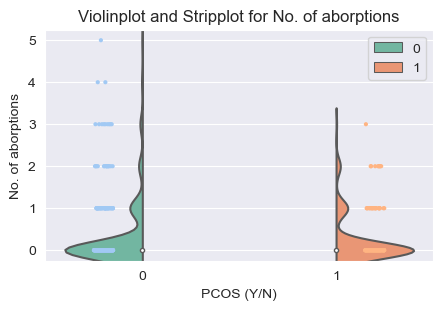

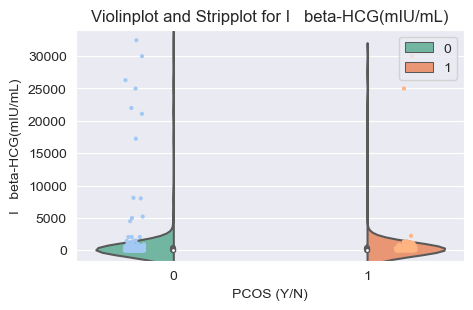

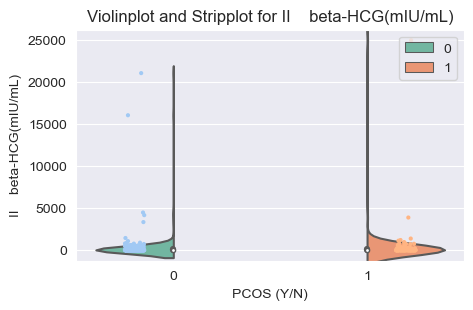

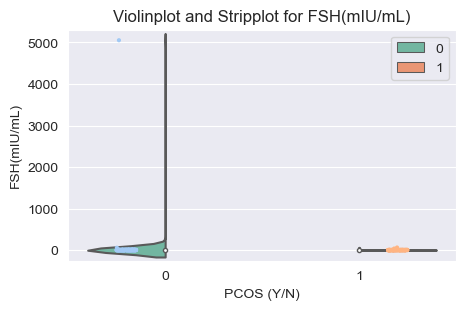

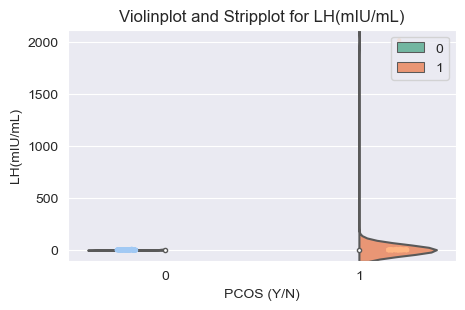

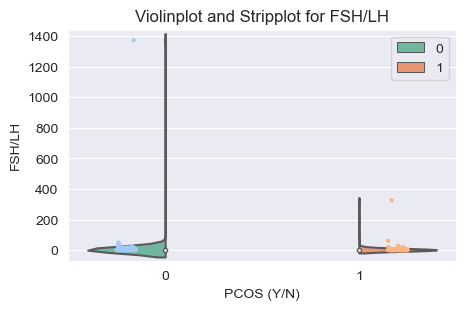

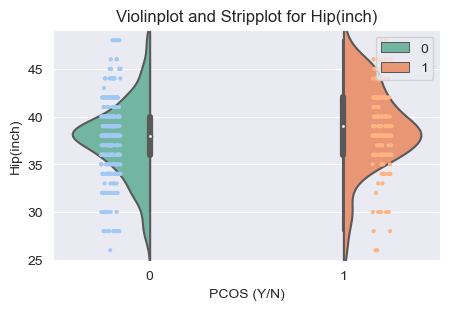

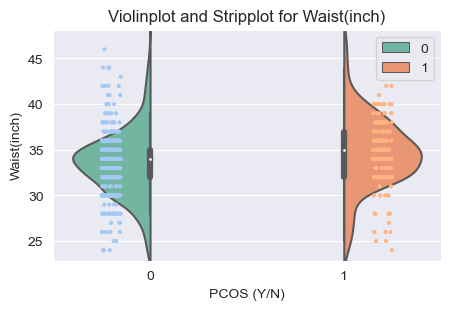

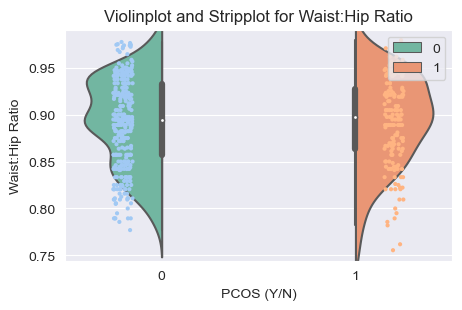

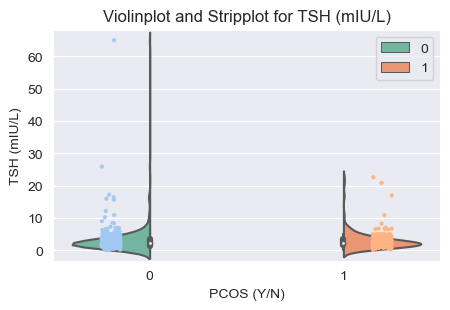

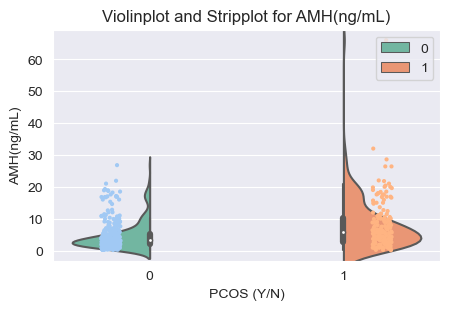

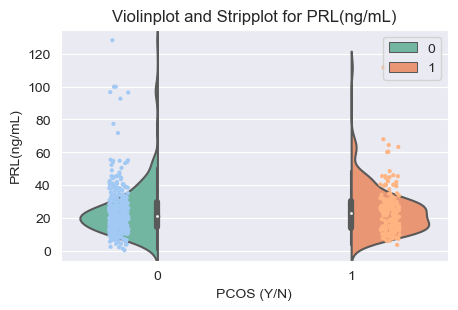

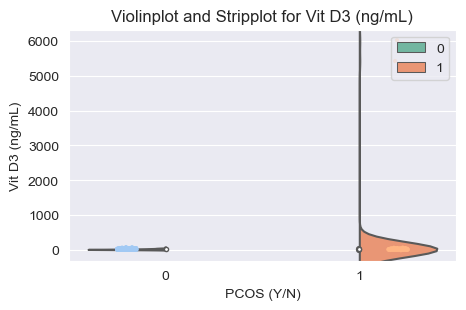

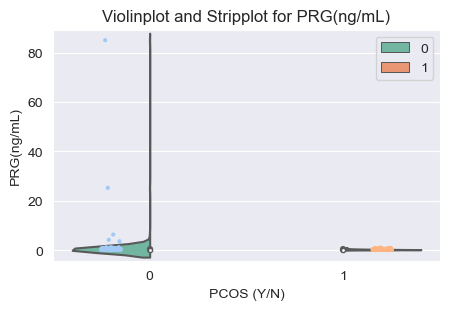

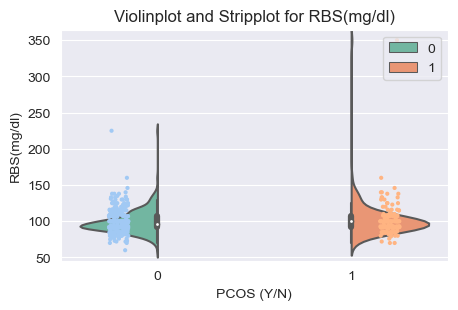

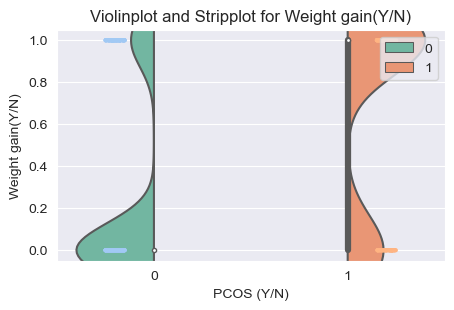

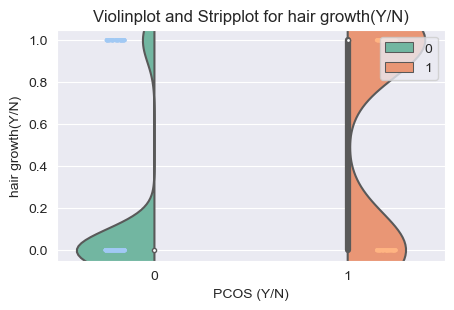

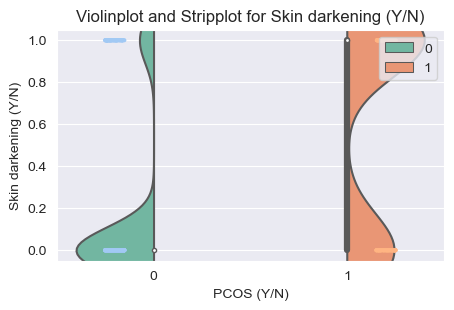

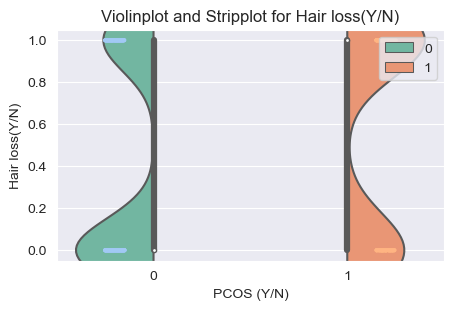

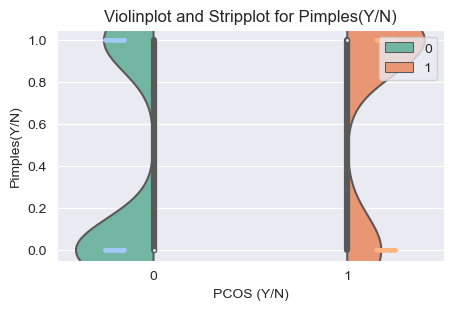

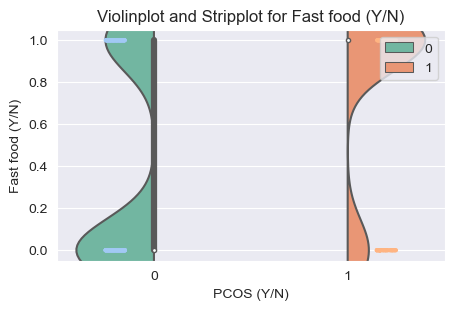

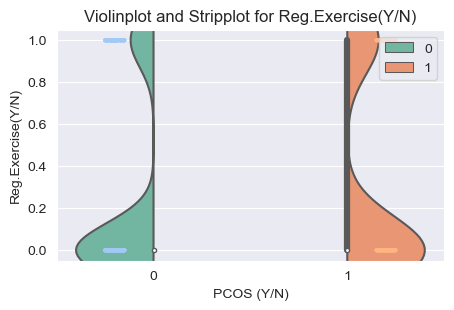

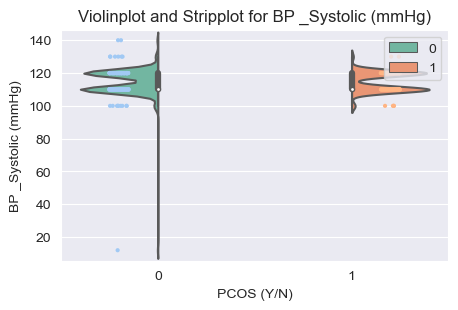

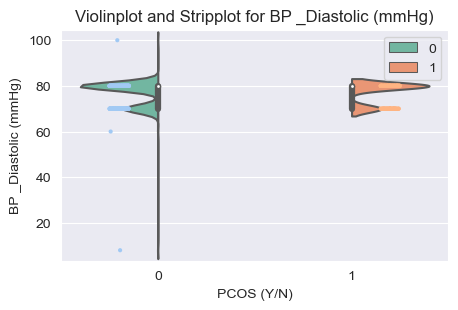

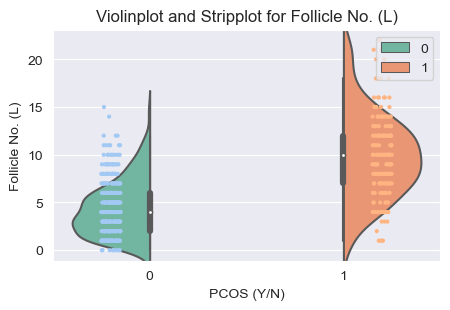

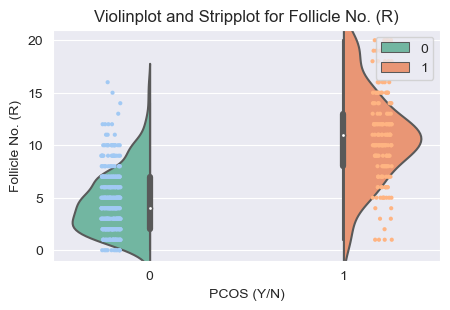

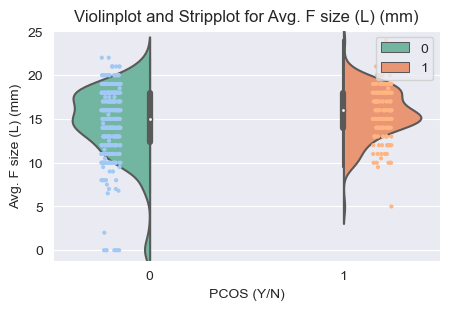

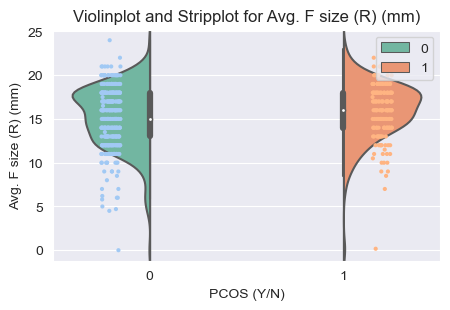

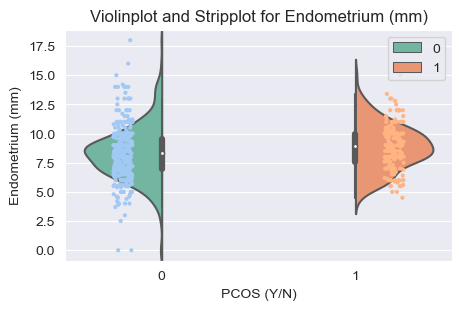

In [24]:

# Identify the continuous features as those that are numeric, excluding the target variable 'PCOS (Y/N)'.
continuous_features = df.select_dtypes(include=[np.number]).columns.tolist()
target = 'PCOS (Y/N)' 

# Creating violin plots with strip plots overlaid for each continuous feature in conjunction with outliers.
for feature in continuous_features:
    plt.figure(figsize=(5,3))
    # Create the violin plot
    sns.violinplot(data=df, x=target, y=feature, hue=target, split=True, palette="Set2")
    # Overlay with a strip plot
    sns.stripplot(data=df, y=feature, x=target, jitter=True, size=3, hue=target, palette="pastel", dodge=True)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.title(f"Violinplot and Stripplot for {feature}")
    # Handling legends: showing only one legend for both plots
    handles, labels = plt.gca().get_legend_handles_labels()
    l = plt.legend(handles[0:2], labels[0:2], loc='upper right')  # Modify loc as needed
    plt.show()


## Exploratory Data Analysis
1. Feature Selection
2. Variations in Menstrual Cycle Duration
3. BMI Patterns
4. Irregularities Patterns in Menstruation Cycle
5. Distribution of Follicles

In [25]:
df.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [26]:
# How all the features correlate with the PCOS. 

corrmat['PCOS (Y/N)'].sort_values(ascending=False)

NameError: name 'corrmat' is not defined

In [ ]:
plt.figure(figsize=(15, 15))  
plt.subplots_adjust(left=0.3, bottom=0.3) 
k = 12  # Number of variables for the positive side of the heatmap
l = 3   # Number of variables for the negative side of the heatmap
cols_p = corrmat.nlargest(k, 'PCOS (Y/N)')['PCOS (Y/N)'].index
cols_n = corrmat.nsmallest(l, 'PCOS (Y/N)')['PCOS (Y/N)'].index
cols = cols_p.append(cols_n)

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=0.9)  
hm = sns.heatmap(cm, cbar=True, cmap="vlag", annot=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,
                 linewidths=.5, linecolor='gray')  
plt.xticks(rotation=45)  
plt.yticks(rotation=0) 
plt.tight_layout()  
plt.show()





### Variations in Menstrual Cycle Duration

In [ ]:
colors = ["#FF0000", "#0000FF"]  # Red for PCOS = Yes, Blue for PCOS = No
# Length of menstrual phase in PCOS vs normal 

fig=sns.lmplot(data=df,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=colors)
plt.show(fig)

### Patterns of BMI

##### With age, menstrual cycles tend to stabilize in individuals without PCOS, while those with PCOS often experience increased irregularities over time.

In [ ]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig = sns.lmplot(data=df, x="Age (yrs)", y="BMI", hue="PCOS (Y/N)", palette='Set1')  # Replace 'Set1' with your colors variable if defined
plt.show()


##### In non-PCOS individuals, BMI remains steady over time, while in PCOS cases, there is a trend of BMI increasing as age advances.

### Irregularities Patterns in Menstruation Cycle

In [ ]:
# Cycle IR wrt age 
sns.lmplot(data =df,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=colors)
plt.show()

##### As individuals without PCOS age, their menstrual cycles typically regulate, but for those with PCOS, the cycles often become more erratic with advancing age.

## Distribution of Follicles

In [ ]:
# Distribution of follicles in both ovaries.
sns.lmplot(data =df,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=colors)
plt.show()

##### In women with PCOS, the follicle count is imbalanced between the left and right ovaries, unlike in individuals with typical health where it's more symmetrical.








In [ ]:
# Exploring the above observation with the help of Boxplot

color = ["#228B22", "#FFD700"]
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=df["PCOS (Y/N)"], y=df[i], color="black", alpha=0.5 )
    sns.boxenplot(x=df["PCOS (Y/N)"], y=df[i], palette=color)
    plt.show()

##### As anticipated, women with PCOS exhibit a greater follicle count, which also displays asymmetry between the ovaries.

In [ ]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=df["PCOS (Y/N)"], y=df[i], color="black", alpha=0.5 )
    sns.boxenplot(x=df["PCOS (Y/N)"], y=df[i], palette=color)
    plt.show()

## Feature importance

In [ ]:

rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=["Importance"])

# Sort the DataFrame to show the most important features on top
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Visualize the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.show()

### The top features are:
1. Follicle_No.(R)
2. Follicle_No.(L)
3. hair_growth(Y/N)
4. Skin_darkening (Y/N)
5. Weight_gain(Y/N)
6. Fastfood(Y/N)
7. Cycle(R/I)
8. AMH(ng/mL)
9. Cycle_length(days)
10. Pimples(Y/N)

## Data Modeling
1. Assigning values to feature as X and target as y
2. Split test and training sets
3. Fitting different models
4. Result
5. Evaluating the confusion matrix Split

#### Assiging the features (X)and target(y).

In [ ]:
X= df.drop(labels = ["PCOS (Y/N)"],axis = 1)
y=df["PCOS (Y/N)"]


#### Train Test Split

In [ ]:
#Splitting the data into test and training sets.

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

#### Fitting different models

## Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

#### Machine Learning CLassifiers used are as belowsion

##### Decision Tree
##### SVM
##### Random Forest
##### KNN
##### Logistic Regression

In [ ]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

# Decision Tree
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

# SVM
svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

# Random Forest
rf_param_grid = {"max_features": ['auto', 'sqrt', 'log2'],
                "n_estimators":[300,500],
                "criterion":["gini"],
                'max_depth' : [4,5,6,7,8,9,10,12],}

# Logistic Regression
logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

# KNN
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}


classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(round(clf.best_score_*100,2))
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

In [ ]:
best_estimators

In [ ]:
dt = best_estimators[0]
svm = best_estimators[1]
rf = best_estimators[2]
lr = best_estimators[3]
knn = best_estimators[4]

## XGBRF

In [ ]:
# XGBRF Classifier
xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=random_state)
xgb_clf.fit(X_train,y_train)
acc_xgb_clf_train = round(xgb_clf.score(X_train, y_train)*100,2) 
acc_xgb_clf_test = round(xgb_clf.score(X_test,y_test)*100,2)
cv_result.append(acc_xgb_clf_train)
print("Training Accuracy: % {}".format(acc_xgb_clf_train))
print("Testing Accuracy: % {}".format(acc_xgb_clf_test))

## CatBoost

In [ ]:
# CatBoost Classifier
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train,y_train)
acc_cat_clf_train = round(cat_clf.score(X_train, y_train)*100,2) 
acc_cat_clf_test = round(cat_clf.score(X_test,y_test)*100,2)
cv_result.append(acc_cat_clf_train)
print("Training Accuracy: % {}".format(acc_cat_clf_train))
print("Testing Accuracy: % {}".format(acc_cat_clf_test))

#### Result

In [ ]:
model_list = ['Decision Tree','SVC','RandomForest','Logistic Regression','KNearestNeighbours','XGBRF','CatBoostClassifier']

In [ ]:
fg = sns.catplot(x=model_list, y=cv_result, height=7, aspect=2, 
                 palette=["#4B8BBE"], saturation=5, kind='bar', data=df)
plt.title('Accuracy of different Classifier Models')
plt.xlabel('Classifier Models')
plt.ylabel('% of Accuracy')

plt.show()


In [ ]:
# Plotly Bar Chart:

import plotly.graph_objects as go
trace1 = go.Bar(
                x = model_list,
                y = cv_result,
                marker = dict(color = 'rgb(32, 55, 110)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'Accuracy of different Classifier Models' , xaxis = dict(title = 'Classifier Models'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=np.arange(len(model_list)), y=cv_result, marker='o', color="#4B8BBE", linewidth=2)
plt.xticks(ticks=np.arange(len(model_list)), labels=model_list)
plt.title('Accuracy of different Classifier Models')
plt.xlabel('Classifier Models')
plt.ylabel('% of Accuracy')
plt.show()


#### Evaluating the confusion matrix Split

In [ ]:
model = [dt,svm,rf,lr,knn,xgb_clf,cat_clf]
predictions = []

In [ ]:
for i in model:
    predictions.append(i.predict(X_test))

for j in range(7):
    cm = confusion_matrix(y_test, predictions[j])
    plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.viridis)
    plt.title(" {} Confusion Matrix".format(model_list[j]))
    plt.xticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.yticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.show()


#### References:
Palak Mehrotra, Jyotirmoy, Chatterjee, Chandan 
Chakraborty, “Automated Screening of Polycystic Ovary 
Syndrome using Machine Learning Techniques”, IEEE, 
2012. 

Bedy Purnama, Untari Novia Wisesti, Adiwijaya, Fhira 
Nhita, Andini Gayatri, Titik Mutiah, “A Classification of 
Polycystic Ovary Syndrome Based on FollicleDetec-tion 
of Ultrasound Images, 2015 3rd International Conference on Information and Communication Tech- nology 
(ICoICT).

Pijush Dutta, Shobhandeb Paul, Madhurima Majumder, “An Efficient SMOTE Based Machine Learning 
classification for Prediction & Detection of PCOS”, Research Square, November 8th, 2021.

## Conclusion

In conclusion, after a thorough computational analysis and evaluation of various machine learning models for the diagnosis and prediction of PCOS, we have quantifiable results to guide the selection of the most effective model. The Random Forest classifier emerged as a particularly strong contender with an accuracy of 89.94%, striking a balance between complexity and performance. The CatBoost Classifier, however, surpassed other models with a remarkable accuracy of 91.41% on the testing set, making it the most precise model among those tested.

The Decision Tree, often considered a baseline model, demonstrated an accuracy of 81.19%, which, while respectable, was overshadowed by more sophisticated algorithms. The SVC and K-Nearest Neighbors models followed with accuracies of 73.3% and 76.19%, respectively, which, despite their utility in certain contexts, were less effective in this particular scenario. Logistic Regression provided a moderate performance of 85.15%.

Notably, the XGBRF model also showed impressive results with a training accuracy of 92.33% and a testing accuracy of 90.18%, suggesting that boosting techniques hold significant potential for this application.

The visualization of model accuracies in bar chart form provided an intuitive understanding of each model's performance, underscoring the effectiveness of ensemble techniques that aggregate predictions from multiple models.

Considering these results, 
##### The CatBoost Classifier is recommended as the best model for predicting PCOS, due to its highest accuracy rate. It demonstrated not only high performance but also the ability to handle the complex patterns present in PCOS-related data.

The superiority of the CatBoost Classifier in this analysis suggests that, when selecting a model for the early detection and prediction of PCOS, one should prioritize algorithms capable of capturing intricate interactions within the data. These findings represent a significant step toward enhancing the predictive analytics in healthcare, particularly in the domain of reproductive health and the management of PCOS.

#### Lincense 
https://github.com/ChaitraliKatkar/Data_Science_Methods-Tools/blob/main/LICENSE MIT License

Copyright (c) 2024 ChaitraliKatkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.